In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### Chelsea & Totenham conversion rate is higher than xG. Their problems is not at the main striker, but at the creative players, or tactic that prevending them to create chances. 

## Man city tends to perform short range shots

### Top 3 has high pass completion

### Top 2 passing playing more in the last 1/3

### Liverpool had a lot more headers than other team

### Top 10 creative players, who play regularly in the team, Manchester City and Liverpool are those teams which got the most out of these creative players

### Chelsea and Liverpool FW & MF are good at pressuring high up the pitch, and win back the ball as soon as they lose possition

In [2]:
season_player_stats = pd.read_csv("/Users/linhvien/Downloads/2021-2022 Football Player Stats.csv",
                                  sep = ';',encoding = "ISO-8859-1")
football5 = pd.read_csv("/Users/linhvien/Downloads/2021-2022 Football Player Stats.csv",
                        sep = ';',encoding = "ISO-8859-1")
season_player_stats_grand = pd.read_csv("/Users/linhvien/Downloads/archive(8)/players_stats_per_season.csv")

In [3]:
season_playermetric  = [ 'Goals','Shots','SoT','SoT%','G/Sh','G/SoT','ShoDist','ShoFK','ShoPK','PKatt','PasTotCmp',
 'PasTotAtt','PasTotCmp%','PasTotDist','PasTotPrgDist','PasShoCmp','PasShoAtt','PasShoCmp%','PasMedCmp','PasMedAtt',
 'PasMedCmp%','PasLonCmp','PasLonAtt','PasLonCmp%','Assists','PasAss','Pas3rd','PPA','CrsPA','PasProg', 'PasAtt',
'PasLive','PasDead','PasFK','TB','PasPress','Sw','PasCrs','CK','CkIn','CkOut','CkStr','PasGround', 'PasLow','PasHigh',
 'PaswLeft','PaswRight','PaswHead', 'TI','PaswOther','PasCmp', 'PasOff', 'PasOut', 'PasInt', 'PasBlocks', 'SCA',
'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib',
 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon','TklDef3rd','TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%',
 'TklDriPast', 'Press', 'PresSucc', 'Press%', 'PresDef3rd', 'PresMid3rd', 'PresAtt3rd', 'Blocks', 'BlkSh', 'BlkShSv',
 'BlkPass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches', 'TouDefPen', 'TouDef3rd', 'TouMid3rd', 'TouAtt3rd', 'TouAttPen',
 'TouLive', 'DriSucc', 'DriAtt','DriSucc%', 'DriPast', 'DriMegs', 'Carries', 'CarTotDist', 'CarPrgDist', 'CarProg',
 'Car3rd', 'CPA', 'CarMis','CarDis', 'RecTarg', 'Rec','Rec%', 'RecProg', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld',
'Off', 'Crs', 'TklW', 'PKwon','PKcon','OG', 'Recov', 'AerWon','AerLost', 'AerWon%']

In [4]:
for i in season_playermetric:
    season_player_stats[i] = season_player_stats[i]*season_player_stats["90s"]

In [5]:
season_player_stats.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.960,45.120,37.120,0.0,1.920,0.96,176.960,15.040,50.880,726.40
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.000,1.986,46.009,0.0,0.993,0.00,224.087,66.862,45.016,1979.38
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.000,9.864,33.976,0.0,0.000,0.00,240.024,24.112,24.112,1370.00
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.984,25.912,73.144,0.0,0.000,0.00,290.936,14.104,14.104,1640.00
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.000,1.000,0.000,0.0,0.000,0.00,2.000,1.000,0.000,50.00


In [6]:
football5.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


In [7]:
epl_players_season = season_player_stats[season_player_stats["Comp"] == "Premier League"]

In [8]:
epl_players = football5[football5.Comp =="Premier League"]

In [9]:
def display_players_season_stats(stat,stat_describe):
    sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})
    a = epl_players_season.groupby(by = "Squad")[stat].sum()
    fig = sns.boxplot(x = a)
    fig.set_title(stat_describe)
    
    fig.get_figure().savefig(stat_describe+".jpg") 
    print(epl_players_season.groupby(by = "Squad")[stat].sum().sort_values(ascending=False).head(10))

Squad
Manchester City    609.978
Liverpool          554.343
West Ham           521.463
Chelsea            496.433
Brighton           486.014
Aston Villa        452.052
Burnley            450.259
Southampton        449.917
Leeds United       436.063
Arsenal            433.081
Name: Crs, dtype: float64


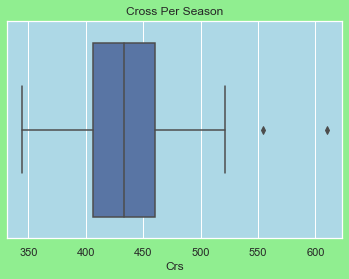

In [10]:
display_players_season_stats("Crs","Cross Per Season")

### Manchester City and Liverpool cross more than other teams. They are the outliers in the boxplot

Squad
Liverpool          721.719
Manchester City    703.749
Chelsea            585.047
Arsenal            580.521
Manchester Utd     504.731
Tottenham          490.906
Leeds United       484.892
Southampton        483.169
Brighton           482.877
Aston Villa        461.006
Name: Shots, dtype: float64


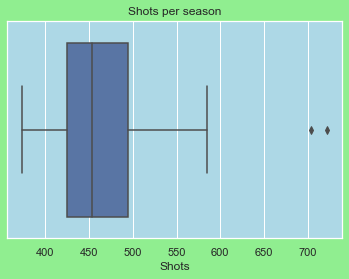

In [11]:
display_players_season_stats("Shots", "Shots per season")

Squad
Manchester City    24031.320
Chelsea            20885.030
Liverpool          20857.780
Tottenham          16912.680
Manchester Utd     16463.850
Brighton           16340.355
Arsenal            16113.630
Leicester City     15912.225
Wolves             15022.780
Crystal Palace     14780.470
Name: PasTotCmp, dtype: float64


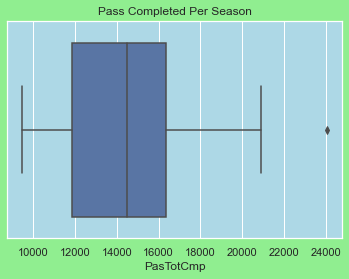

In [12]:
display_players_season_stats("PasTotCmp", "Pass Completed Per Season")

### MAN CITY PASS A LOT MORE

Squad
Manchester City    10089.630
Arsenal             8200.230
Leeds United        7342.445
Liverpool           5943.921
Manchester Utd      5806.096
Wolves              5572.118
Chelsea             5290.942
Aston Villa         5278.819
Tottenham           5056.291
Brighton            4979.475
Name: PaswLeft, dtype: float64


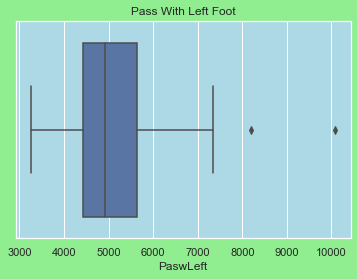

In [13]:
display_players_season_stats("PaswLeft","Pass With Left Foot")

Squad
Chelsea            16995.801
Liverpool          16646.994
Manchester City    15244.474
Tottenham          13171.910
Brighton           13095.189
Leicester City     12674.331
Manchester Utd     12263.950
Crystal Palace     11550.407
West Ham           11240.655
Wolves             10916.565
Name: PaswRight, dtype: float64


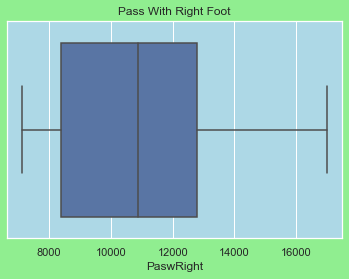

In [14]:
display_players_season_stats("PaswRight","Pass With Right Foot")

Squad
Manchester City    1146.082
Liverpool          1092.164
Chelsea             963.923
Arsenal             920.876
Manchester Utd      841.155
Tottenham           817.157
Brighton            748.226
Southampton         732.445
Aston Villa         724.762
Leeds United        711.321
Name: SCA, dtype: float64


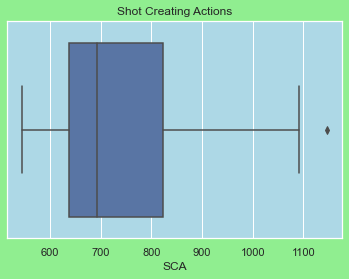

In [15]:
display_players_season_stats("SCA", "Shot Creating Actions")

Squad
Liverpool          73.150
Manchester City    63.794
Chelsea            60.772
Tottenham          57.638
Manchester Utd     47.788
Aston Villa        35.062
West Ham           33.818
Leicester City     30.985
Wolves             29.652
Arsenal            28.150
Name: TB, dtype: float64


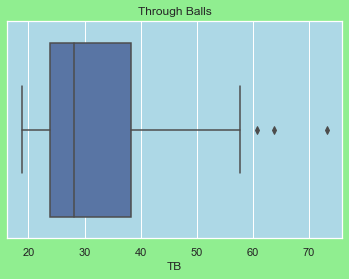

In [16]:
display_players_season_stats("TB","Through Balls")

Squad
Liverpool          1966.867
Manchester City    1766.320
Chelsea            1614.232
Tottenham          1318.238
Manchester Utd     1303.586
Leeds United       1277.954
Brighton           1210.387
Arsenal            1168.357
Leicester City     1143.709
West Ham           1122.954
Name: PasProg, dtype: float64


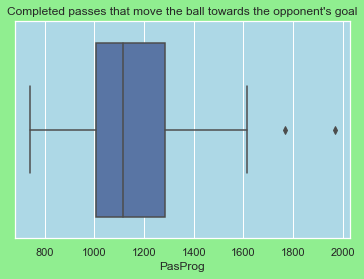

In [17]:
display_players_season_stats("PasProg","Completed passes that move the ball towards the opponent's goal")

## Top clubs see goal responsibility sharing among teammates. In other words, Top clubs have more goal scorers in their teams. 

### Liverpool & city cross alot

## Man city has more balance between left and right. Liverpool, chelsea & tottenham play more on the right.

# Chelsea and liverpool need a good left foot attacker. Top 10 creative players, who play regularly in the team, Manchester City and Liverpool are those teams which got the most out of these creative players, and Chelsea need to improve. & That is the reason Liverpool & Manchester City are scoring a lot of goals. They are able to create more chances by getting the most out of their creative players. 

In [22]:
football5[football5.Pos == "DFMF"].Player

47        Sofiane Alakouch
77          Ibrahim Amadou
266          Marco Benassi
361       Domagoj Bradari?
435       Daniel Caligiuri
               ...        
2790            Dídac Vilà
2871          Okay Yokuþlu
2872          Okay Yokuþlu
2896    Deyovaisio Zeefuik
2911          Nadir Zortea
Name: Player, Length: 66, dtype: object

In [30]:
# using hypothesis : one sample, one tail T test to pick out the feature stats for each position on the field:
# Each player has different role in a football team, so each stat mean differently for each position. For example, 
# shooting mean more for a striker than a defender. Therefore, a striker's shooting stat are supposed to be higher 
# than the population's mean

from scipy import stats
# H0 : The selected metric of the selected position is equal or less than the population's mean
# Ha : The selected metric of the selected position greater than the population's mean
# Confidence is 99%
pos_list = football5.Pos.unique()
football5.groupby(by = "Pos").Rk.count()

Pos
DF      942
DFFW     35
DFMF     66
FW      419
FWDF     30
FWMF    307
GK      216
GKMF      1
MF      598
MFDF     68
MFFW    239
Name: Rk, dtype: int64

In [32]:
## remove GKMF in the hypothesis test since it has only 1 sample
a = np.where(pos_list == "GKMF")
pos_list = np.delete(pos_list,a)
pos_list

array(['DF', 'MF', 'FW', 'MFFW', 'FWMF', 'GK', 'DFMF', 'FWDF', 'MFDF',
       'DFFW'], dtype=object)

In [113]:
#looping through the metric and position list and perform hypothesis tests. Append the metric and Position into a 
#dictionary if we manage to reject H0 at the selected metric and position. 
dic= {}
for metric in season_playermetric:
    more = []
    for pos in pos_list:
        a = football5[football5.Pos ==pos][metric].sample(30,random_state = 3)
        b = football5[metric].mean()
        t2, p2 = stats.ttest_1samp(a,b,alternative ="greater")
        if (p2/2 < 0.01) &(t2>0): 
            more.append(pos)
    dic[metric] = more
    
#change the dic format to POS : [List of metric]
dic_r ={}
for e in dic:
    for i in dic[e]:
        try:
            dic_r[i] = dic_r[i]+[e]
        except:
            dic_r[i] = [e]

In [166]:
def drawing_radar_chart(metric,player_name_list):
    categories = metric
    categories = [*categories, categories[0]]
    player_metric_dic = {}
    for player in player_name_list:
        player_metric = football5[football5.Player == player][metric].values[0,:]
        print(player_metric)
        player_metric_dic[player] = [*player_metric, player_metric[0]]

    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    plt.figure(figsize=(8, 8))
    plt.subplot(polar=True)
    for player in player_name_list:
        plt.plot(label_loc, player_metric_dic[player], label=player)
    plt.title('attacker comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()

In [144]:
print(dic_r["FW"],"\n","\n",dic_r["FWMF"])

['Shots', 'SoT', 'PresAtt3rd', 'TouAttPen', 'CarMis', 'RecProg', 'Off', 'AerLost'] 
 
 ['Shots', 'SoT', 'PasAss', 'PPA', 'PasCrs', 'SCA', 'ScaPassLive', 'ScaDrib', 'ScaSh', 'GCA', 'Press', 'PresMid3rd', 'PresAtt3rd', 'TouAtt3rd', 'TouAttPen', 'DriSucc', 'DriAtt', 'DriPast', 'CarProg', 'Car3rd', 'CPA', 'CarMis', 'CarDis', 'RecTarg', 'RecProg', 'Fld', 'Off', 'Crs', 'AerLost']


In [145]:
list(set(dic_r["FW"]).intersection(dic_r["FWMF"]))

['CarMis',
 'Off',
 'TouAttPen',
 'AerLost',
 'Shots',
 'RecProg',
 'PresAtt3rd',
 'SoT']

In [174]:
attacker_list = [ 'TouAttPen', 'Shots','RecProg','PresAtt3rd','SoT']

In [189]:
city_fw_list = football5[(football5.Pos =="FW")& (football5.Squad == "Manchester City") &
          (football5.Starts >10)]["Player"].values.tolist()

[6.4  2.46 7.8  9.92 0.93]
[9.11 2.11 9.11 6.57 0.75]
[7.99 3.01 7.7  6.36 1.  ]
[8.01 3.37 8.37 4.76 1.08]
[9.19 2.29 9.92 5.59 1.06]


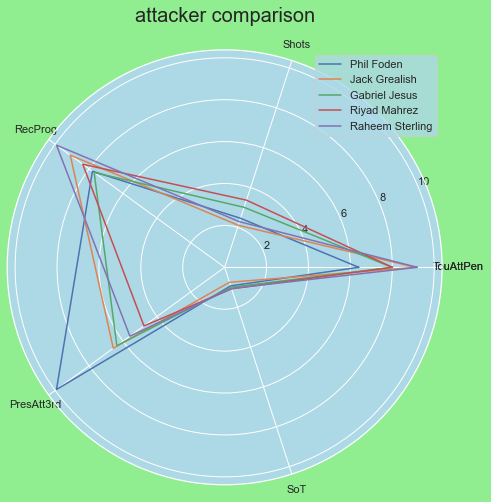

In [176]:
drawing_radar_chart(attacker_list, city_fw_list)

In [184]:
chel_fw_list = city_fw_list = football5[((football5.Pos =="FW")|(football5.Pos =="FWMF"))& 
        (football5.Squad == "Chelsea") & (football5.Starts >10)]["Player"].values.tolist()

[ 7.01  2.79 10.5   9.35  1.14]
[5.79 1.59 6.82 5.33 0.65]
[5.99 2.37 8.42 6.84 0.73]
[8.11 3.15 9.58 8.88 1.12]
[4.63 3.61 8.1  6.46 1.29]


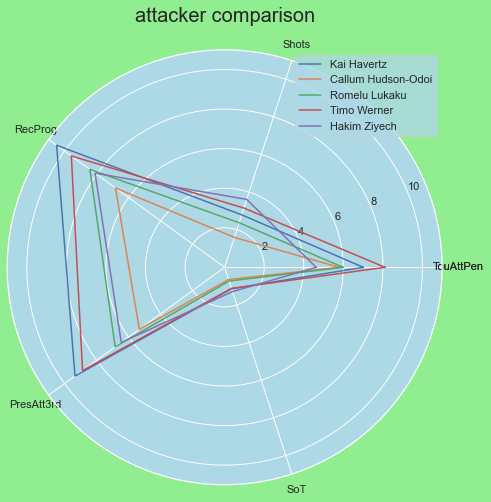

In [178]:
drawing_radar_chart(attacker_list, chel_fw_list)

In [182]:
player_list = ["Kai Havertz", "Phil Foden", "Mohamed Salah"]

In [179]:
liv_fw_list = city_fw_list = football5[((football5.Pos =="FW")|(football5.Pos =="FWMF"))& 
        (football5.Squad == "Liverpool") & (football5.Starts >10)]["Player"].values.tolist()

[ 8.21  3.58 10.4   6.89  1.32]
[7.22 3.46 8.63 9.66 1.25]
[ 7.99  3.16 11.4   6.45  1.18]
[10.8   4.36 12.    8.27  1.6 ]


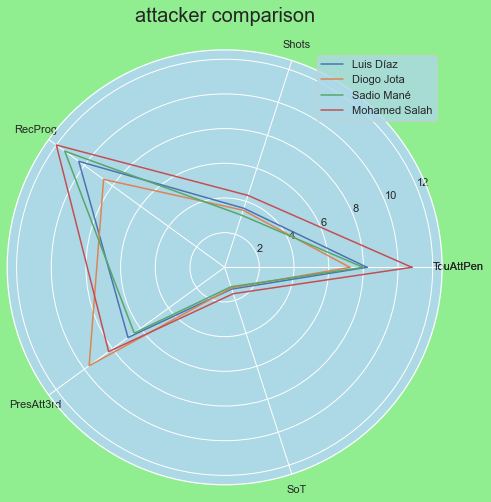

In [180]:
drawing_radar_chart(attacker_list, liv_fw_list)

[ 7.01  2.79 10.5   9.35  1.14]
[6.4  2.46 7.8  9.92 0.93]
[10.8   4.36 12.    8.27  1.6 ]


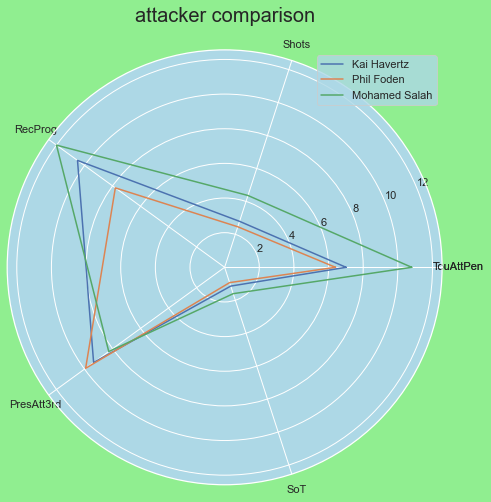

In [183]:
drawing_radar_chart(attacker_list,player_list)

In [185]:
chel_fw_list

['Kai Havertz',
 'Callum Hudson-Odoi',
 'Romelu Lukaku',
 'Timo Werner',
 'Hakim Ziyech']

In [187]:
liv_fw_list

['Luis Díaz', 'Diogo Jota', 'Sadio Mané', 'Mohamed Salah']

In [190]:
city_fw_list

['Phil Foden',
 'Jack Grealish',
 'Gabriel Jesus',
 'Riyad Mahrez',
 'Raheem Sterling']

[5.99 2.37 8.42 6.84 0.73]
[ 7.99  3.16 11.4   6.45  1.18]
[7.99 3.01 7.7  6.36 1.  ]


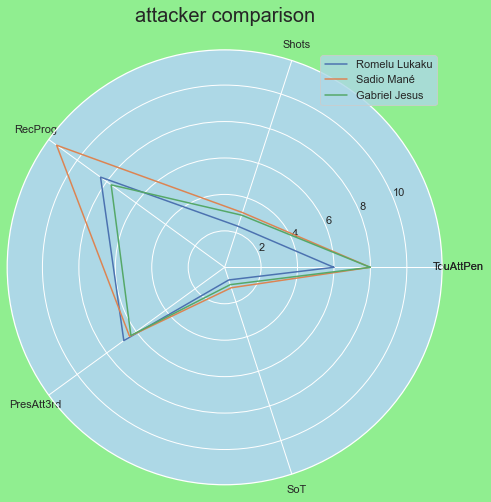

In [192]:
player_list_2 = ['Romelu Lukaku','Sadio Mané','Gabriel Jesus']
drawing_radar_chart(attacker_list,player_list_2)

In [373]:
liv_attacker_mean = football5[(football5.Squad =="Liverpool") &
         (football5.Pos == "FW") &(football5.Starts >10)][attacker_list].mean().values.tolist()

In [374]:
chel_attacker_mean = football5[(football5.Squad =="Chelsea") &
         ((football5.Pos == "FW")| (football5.Pos == "FWMF") | (football5.Pos == "MFFW"))
        &(football5.Starts >10)][attacker_list].mean().values.tolist()

In [375]:
city_attacker_mean = football5[(football5.Squad =="Manchester City") &
         (football5.Pos == "FW") &(football5.Starts >10)][attacker_list].mean().values.tolist()

In [376]:
city_attacker_mean

[8.139999999999999,
 2.6479999999999997,
 8.58,
 6.640000000000001,
 0.9640000000000001]

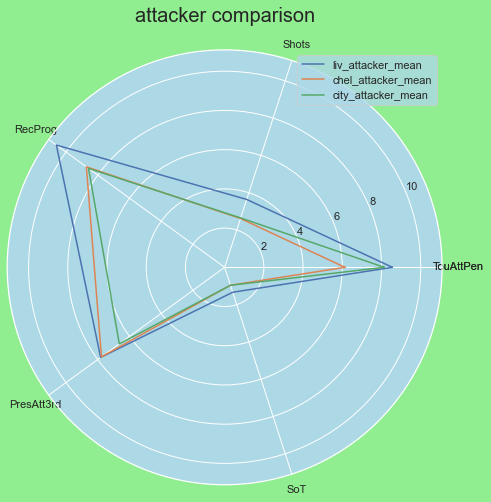

In [377]:
categories = attacker_list
categories = [*categories, categories[0]]
liv_attacker_mean = [*liv_attacker_mean, liv_attacker_mean[0]]
chel_attacker_mean = [*chel_attacker_mean, chel_attacker_mean[0]]
city_attacker_mean = [*city_attacker_mean, city_attacker_mean[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, liv_attacker_mean, label="liv_attacker_mean")
plt.plot(label_loc, chel_attacker_mean, label="chel_attacker_mean")
plt.plot(label_loc, city_attacker_mean, label="city_attacker_mean")

plt.title('attacker comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

In [694]:
liv = football5[(football5.Squad =="Liverpool") &
         (football5.Pos == "FW") &(football5.Starts >10)]["PPA"]

In [695]:
city = football5[(football5.Squad =="Manchester City") &
         (football5.Pos == "FW") &(football5.Starts >10)]["PPA"]

In [697]:
chel = football5[(football5.Squad =="Chelsea") &
         ((football5.Pos == "FW")| (football5.Pos == "FWMF") | (football5.Pos == "MFFW") )
        &(football5.Starts >10)]["PPA"]

<AxesSubplot:ylabel='Frequency'>

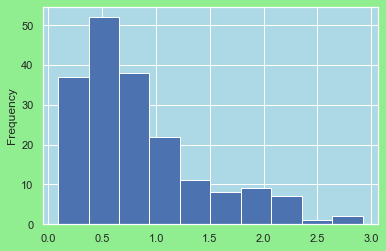

In [696]:
football5[(football5.Pos == "FW")&(football5.Starts>10)]["PPA"].plot.hist()

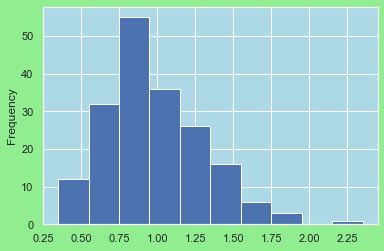

In [318]:
plot = football5[(football5.Pos == "FW")&(football5.Starts>10)]["SoT"].plot.hist()

In [ ]:
attacker_list = [ 'TouAttPen', 'Shots','RecProg','PresAtt3rd','SoT']

In [698]:
##perform ttest, normal distributed
#H0: Manchester City attacker shots less than chelsea's
#H0: Manchester City 
t,p=stats.ttest_ind(city,chel,alternative="greater")

In [699]:
p/2 < 0.05

True

In [700]:
p/2

0.02202127360786897

In [390]:
#We reject H0 : Manchester City shots more than Chelsea

In [391]:
#We reject H0 : Liv shots more than Chelsea

In [422]:
mf_metric= [
  'Pas3rd',
  'PasProg',
  'PasPress',
  'TklWon',
  'TklMid3rd',
  'TklDriAtt',
  'TklDriPast',
  'PresSucc',
  'Tkl+Int',
  'Fls',
  'TklW',
  'Recov']

In [423]:
liv_mf_mean = football5[(football5.Squad =="Liverpool") &
         (football5.Pos == "MF") &(football5.Starts >10)][mf_metric].mean().values.tolist()
city_mf_mean = football5[(football5.Squad =="Manchester City") &
         (football5.Pos == "MF") &(football5.Starts >10)][mf_metric].mean().values.tolist()
chel_mf_mean = football5[(football5.Squad =="Chelsea") &
         (football5.Pos == "MF") &(football5.Starts >10)][mf_metric].mean().values.tolist()

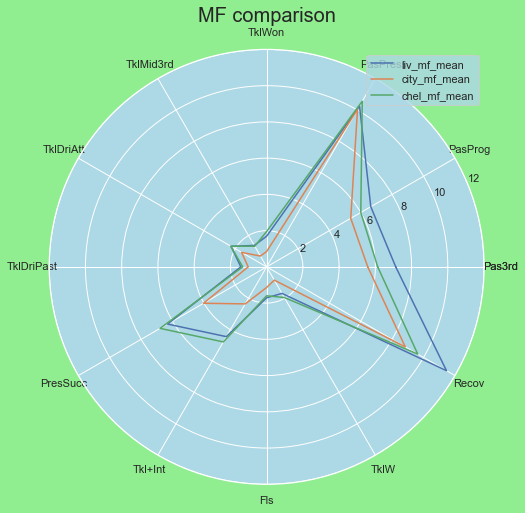

In [424]:
categories = mf_metric
categories = [*categories, categories[0]]
liv_mf_mean = [*liv_mf_mean, liv_mf_mean[0]]
city_mf_mean = [*city_mf_mean, city_mf_mean[0]]
chel_mf_mean = [*chel_mf_mean, chel_mf_mean[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, liv_mf_mean, label="liv_mf_mean")
plt.plot(label_loc, city_mf_mean, label="city_mf_mean")
plt.plot(label_loc, chel_mf_mean, label="chel_mf_mean")

plt.title('MF comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

In [533]:
def team_data_radar_chart(mf_list):
    data_chel = football5[(football5.Squad =="Chelsea") &
             (football5.Pos == "MF") &(football5.Starts >10)][mf_list].mean().values.tolist()
    data_city = football5[(football5.Squad =="Manchester City") &
             (football5.Pos == "MF") &(football5.Starts >10)][mf_list].mean().values.tolist()
    data_liv = football5[(football5.Squad =="Liverpool") &
             (football5.Pos == "MF") &(football5.Starts >10)][mf_list].mean().values.tolist()
    return data_chel,data_city,data_liv


In [644]:
def drawing_web(mf_list,data_chel,data_city,data_liv):
    categories = mf_list
    categories = [*categories, categories[0]]
    data_chel = [*data_chel, data_chel[0]]
    data_city = [*data_city, data_city[0]]
    data_liv = [*data_liv, data_liv[0]]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    plt.figure(figsize=(8, 8))
    plt.subplot(polar=True)
    plt.plot(label_loc, data_chel, label="chel")
    plt.plot(label_loc, data_city, label="city")
    plt.plot(label_loc, data_liv, label="liv")

    plt.title('Top 3 comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()


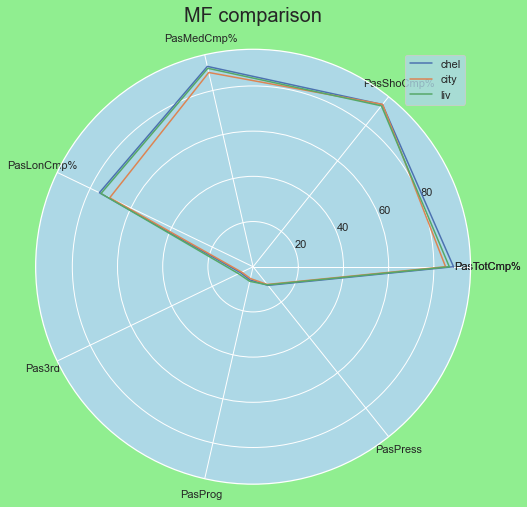

In [544]:
mf_list_2 = [ 'PasTotCmp%',
 'PasShoCmp%',
 'PasMedCmp%',
 'PasLonCmp%',
 'Pas3rd',
 'PasProg',
 'PasPress']
data_chel,data_city,data_liv = team_data_radar_chart(mf_list_2)
drawing_web(mf_list_2,data_chel,data_city,data_liv)

In [545]:
dic_r["MF"]

['ShoDist',
 'PasTotCmp%',
 'PasShoCmp%',
 'PasMedCmp%',
 'PasLonCmp%',
 'Pas3rd',
 'PasProg',
 'PasPress',
 'Tkl',
 'TklWon',
 'TklMid3rd',
 'TklDriAtt',
 'TklDriPast',
 'Press',
 'PresSucc',
 'Press%',
 'PresDef3rd',
 'PresMid3rd',
 'Tkl+Int',
 'TouMid3rd',
 'Rec%',
 'Fls',
 'TklW',
 'Recov']

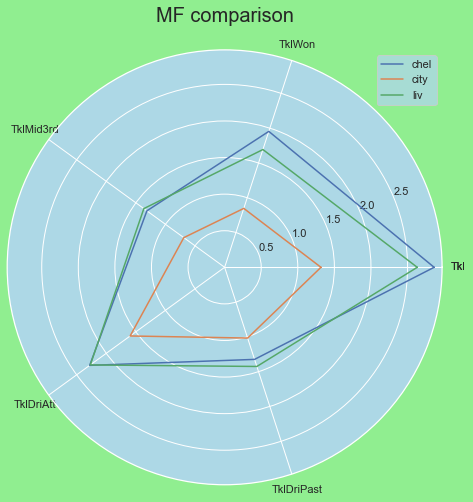

In [546]:
mf_list_3 = ['Tkl',
 'TklWon',
 'TklMid3rd',
 'TklDriAtt',
 'TklDriPast']
data_chel_3,data_city_3,data_liv_3 = team_data_radar_chart(mf_list_3)
drawing_web(mf_list_3,data_chel_3,data_city_3,data_liv_3)

In [548]:
mf_list_4 = ['Press',
 'PresSucc',
 'Press%',
 'PresDef3rd',
 'PresMid3rd']

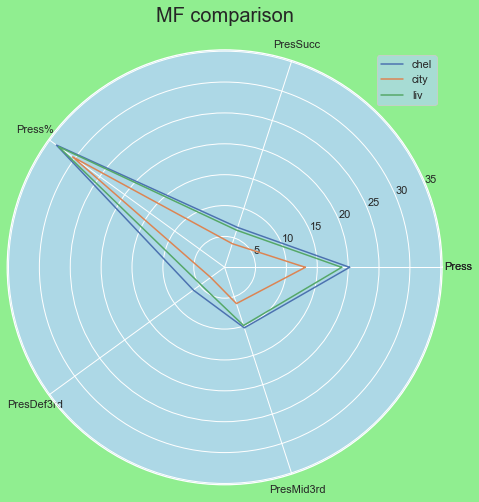

In [549]:
data_chel_4,data_city_4,data_liv_4 = team_data_radar_chart(mf_list_4)
drawing_web(mf_list_4,data_chel_4,data_city_4,data_liv_4)

In [552]:
mf_list_5 = ['Tkl+Int',
 'Fls',
 'TklW',
 'Recov']

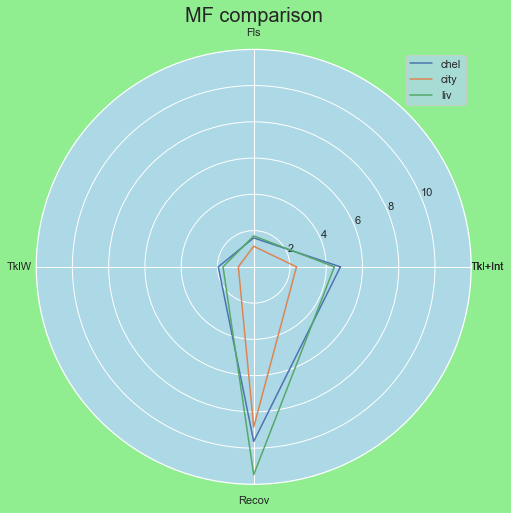

In [553]:
data_chel_5,data_city_5,data_liv_5 = team_data_radar_chart(mf_list_5)
drawing_web(mf_list_5,data_chel_5,data_city_5,data_liv_5)

In [598]:
city_mf_metric = []
for metric in season_playermetric:
    a = football5[(football5.Pos =="MF")&(football5.Starts>10)&
                  (football5.Squad=="Manchester City")][metric]
    b = football5[(football5.Pos == "MF")&(football5.Starts>10)][metric].mean()
    t2, p2 = stats.ttest_1samp(a,b,alternative ="greater")
    if (p2/2 < 0.05) &(t2>0): 
        city_mf_metric.append(metric)


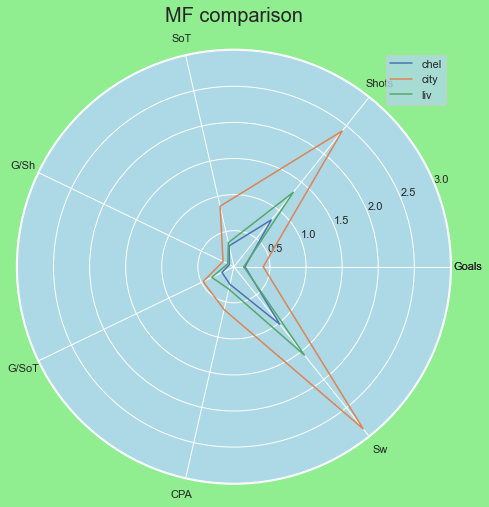

In [590]:
mf_list_6 = ['Goals','Shots','SoT','G/Sh','G/SoT', 'CPA','Sw',]
data_chel_6,data_city_6,data_liv_6 = team_data_radar_chart(mf_list_6)
drawing_web(mf_list_6,data_chel_6,data_city_6,data_liv_6)

In [601]:
city_fw_metric = []
for metric in season_playermetric:
    a = football5[(football5.Pos =="FW")&(football5.Starts>10)&
                  (football5.Squad=="Manchester City")][metric]
    b = football5[(football5.Pos == "FW")&(football5.Starts>10)][metric].mean()
    t2, p2 = stats.ttest_1samp(a,b,alternative ="greater")
    if (p2/2 < 0.05) &(t2>0): 
        city_fw_metric.append(metric)

In [602]:
city_fw_metric

['PasTotCmp',
 'PasTotAtt',
 'PasTotCmp%',
 'PasTotDist',
 'PasTotPrgDist',
 'PasShoCmp',
 'PasShoAtt',
 'PasShoCmp%',
 'PasMedCmp',
 'PasMedAtt',
 'PasMedCmp%',
 'Assists',
 'PasAss',
 'PPA',
 'CrsPA',
 'PasProg',
 'PasAtt',
 'PasLive',
 'PasCrs',
 'PasGround',
 'PasCmp',
 'PasInt',
 'PasBlocks',
 'SCA',
 'ScaPassLive',
 'GCA',
 'GcaPassLive',
 'Press%',
 'Int',
 'Tkl+Int',
 'Touches',
 'TouAtt3rd',
 'TouAttPen',
 'TouLive',
 'DriSucc',
 'DriAtt',
 'DriSucc%',
 'DriPast',
 'Carries',
 'CarTotDist',
 'CarPrgDist',
 'CarProg',
 'Car3rd',
 'CPA',
 'CarDis',
 'RecTarg',
 'Rec',
 'Rec%',
 'RecProg',
 'Crs',
 'Recov']

In [611]:
list_fw_1 = ['Assists',
 'PasAss',
 'PPA',
 'CrsPA',
 'SCA',
'GCA',
'CPA']

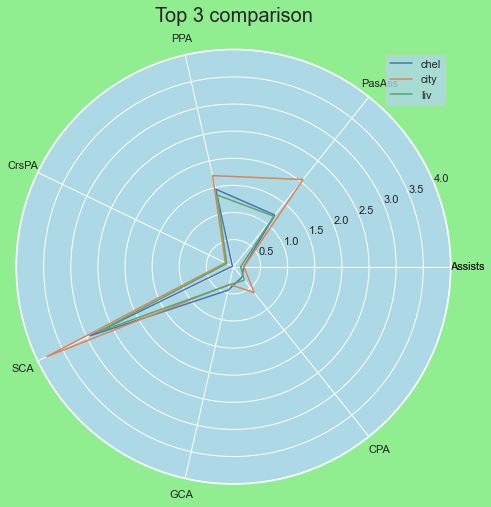

In [645]:
data_chel_9,data_city_9,data_liv_9 = team_data_radar_chart(list_fw_1)
drawing_web(list_fw_1,data_chel_9,data_city_9,data_liv_9)

In [641]:
list_fw_2 = ['RecTarg',
 'TouAtt3rd',
 'TouAttPen',
"Crs"]

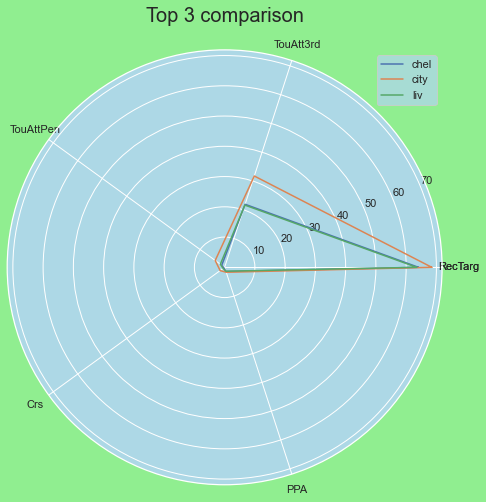

In [647]:
data_chel_10,data_city_10,data_liv_10 = team_data_radar_chart(list_fw_2)
drawing_web(list_fw_2,data_chel_10,data_city_10,data_liv_10)